In [12]:
#check the encoding of the file as it is not UTF-8
import chardet

with open('sales_data.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(f"The detected encoding is: {result['encoding']}")


The detected encoding is: Windows-1252


In [13]:
#read the file with the detected encoding

import pandas as pd

df = pd.read_csv('sales_data.csv', encoding='Windows-1252')

df.head()



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
# 2. Calculate the total sales for each product.

#groupby() method is used to split the data into groups based on some criteria
#in this case, the criteria is the productline and the sum of sales is calculated for each productline

sales = df.groupby('PRODUCTLINE')['SALES'].sum()
print(sales)
type(sales)


# 3. Calculate the average quantity sold in the year 2003, 2004 and 2005, make a bar chat to display the quantity of products yearwise yearwise.
# in this case, the criteria is the year and the average quantity is calculated for each year
avg = df.groupby('YEAR_ID')['QUANTITYORDERED'].mean()
print(avg)




PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64
YEAR_ID
2003    34.612000
2004    34.813383
2005    36.884937
Name: QUANTITYORDERED, dtype: float64


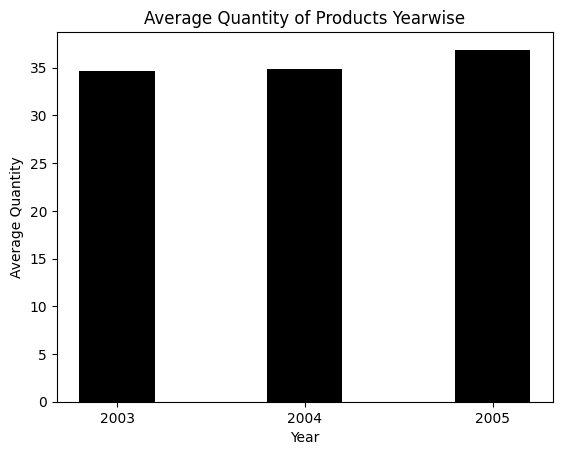

In [15]:
# bar chart to display the quantity of products yearwise
import matplotlib.pyplot as plt

# x-axis values is the year and y-axis values is the average quantity
year = [2003, 2004, 2005]

plt.bar(year, avg, color='black', width=0.4)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Average Quantity')
plt.title('Average Quantity of Products Yearwise')
plt.show()


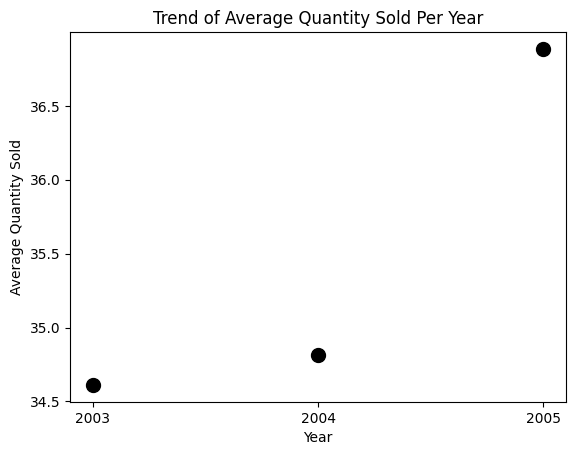

In [16]:
# scatter plot to display the trend of average quantity sold per year

# x-axis values is the year and y-axis values is the average quantity
plt.scatter(year, avg, color='black', s=100, marker='o')
plt.xticks(year)  
plt.xlabel('Year')
plt.ylabel('Average Quantity Sold') 
plt.title('Trend of Average Quantity Sold Per Year') 
plt.show()
